In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, Conv2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils


Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 6s 0us/step


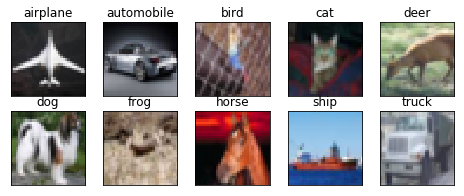

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [7]:
# Define the model
model = Sequential()                                                               #OutputImage | Output receptive field

#INPUT LAYER
model.add(Convolution2D(128, 3, 3, border_mode='same', input_shape=(32, 32, 3)))    #32          | 3x3
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(Dropout(0.1))

# CONVOLUTIONAL LAYER
model.add(Convolution2D(256, 3, 3, border_mode='same'))                             #32          | 5x5
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(Dropout(0.1))

#TRANSITION LAYER
model.add(MaxPooling2D(pool_size=(2, 2)))                                          #16          | 10x10
model.add(Conv2D(64, (1, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))

# CONVOLUTIONAL LAYER
model.add(Convolution2D(128, 3, 3, border_mode='same'))                             #16          | 12x12
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(Dropout(0.1))
model.add(Convolution2D(256, 3, 3, border_mode='same'))                             #16          | 14x14
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(Dropout(0.1))

#TRANSITION LAYER
model.add(MaxPooling2D(pool_size=(2, 2)))                                          #8           | 28x28
model.add(Conv2D(64, (1, 1)))
model.add(BatchNormalization())

# CONVOLUTIONAL LAYER
model.add(Convolution2D(128, 3, 3, border_mode='same'))                             #8           | 30x30
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(Dropout(0.1))
model.add(Convolution2D(256, 3, 3, border_mode='same'))                             #8           | 32x32
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(Dropout(0.1))

#OUTPUT LAYER
model.add(Conv2D(10, 1, activation='relu'))                                        #8
model.add(Conv2D(10, 8))
model.add(Flatten())
model.add(Activation('softmax'))

W0630 18:16:36.309553 139660820273024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  after removing the cwd from sys.path.
W0630 18:16:36.351321 139660820273024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0630 18:16:36.357239 139660820273024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0630 18:16:36.395056 139660820273024 deprecation_wrappe

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 128)       3584      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 128)       512       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 256)       295168    
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 256)       1024      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 256)       0         
__________

In [9]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

W0630 18:16:39.897480 139660820273024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:348: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '
W0630 18:16:41.430110 139660820273024 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/1
391/391 [==============================] - 37s 95ms/step - loss: 1.2278 - acc: 0.5582 - val_loss: 1.1220 - val_acc: 0.6166
Model took 38.67 seconds to train


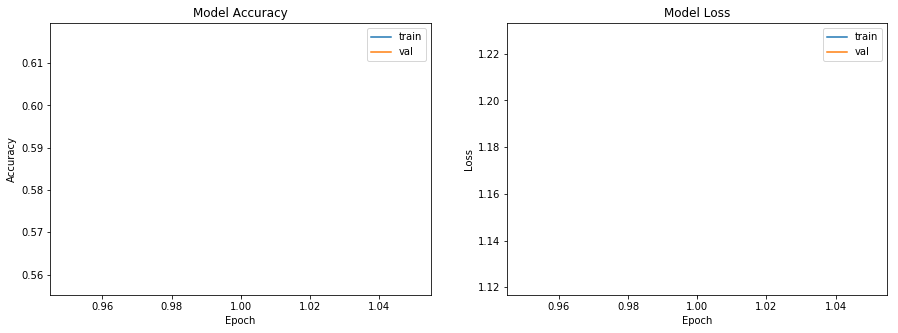

Accuracy on test data is: 22.09


In [10]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(featurewise_center=False, featurewise_std_normalization=True)
datagen.fit(train_features)
training_set= datagen.flow(train_features, train_labels, batch_size=128)
test_set= datagen.flow(test_features, test_labels, batch_size=128)

# train the model
start = time.time()

model_info = model.fit_generator(training_set, steps_per_epoch=len(training_set), epochs=1, validation_data = test_set, validation_steps = len(test_set))

end = time.time()
# Save entire model to a HDF5 file
model.save('my_model.h5')
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 128)       3584      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 128)       512       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 256)       295168    
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 256)       1024      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 256)      

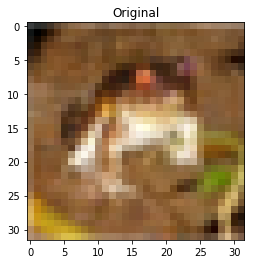

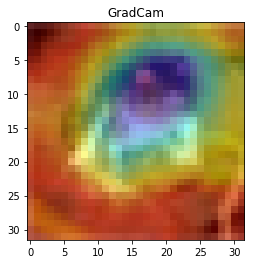

In [12]:
# Recreate the exact same model, including weights and optimizer.
from tensorflow import keras
new_model = keras.models.load_model('my_model.h5')
new_model.summary()

from keras.preprocessing import image
from PIL import Image
import keras.backend as K
import numpy as np
import cv2
import sys

(train_features_new, train_labels_new), (test_features_new, test_labels_new) = cifar10.load_data()
img = train_features_new[0]
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)


preds = model.predict(x)
class_idx = np.argmax(preds[0])
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("conv2d_8")

grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(256):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
from google.colab.patches import cv2_imshow
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
plt.imshow(img)
plt.title("Original")
plt.show()
plt.clf()
plt.imshow(superimposed_img)
plt.title("GradCam")
plt.show()


--2019-06-30 18:23:52--  https://raw.githubusercontent.com/yu4u/cutout-random-erasing/master/random_eraser.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 888 [text/plain]
Saving to: ‘random_eraser.py.3’

random_eraser.py.3  100%[===================>]     888  --.-KB/s    in 0s      

2019-06-30 18:23:53 (214 MB/s) - ‘random_eraser.py.3’ saved [888/888]



/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:348: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/1
391/391 [==============================] - 32s 82ms/step - loss: 0.8996 - acc: 0.6807 - val_loss: 1.1486 - val_acc: 0.6203
Model took 32.12 seconds to train


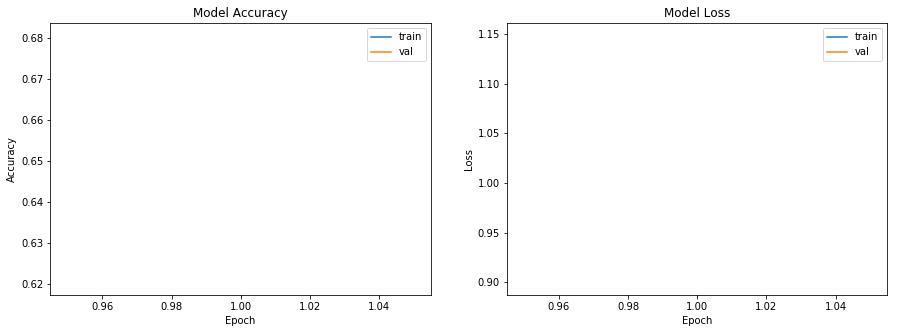

In [17]:
!wget https://raw.githubusercontent.com/yu4u/cutout-random-erasing/master/random_eraser.py
from random_eraser import get_random_eraser

datagen = ImageDataGenerator(featurewise_center=False, featurewise_std_normalization=True, preprocessing_function=get_random_eraser(v_l=0, v_h=1))
datagen.fit(train_features)
training_set= datagen.flow(train_features, train_labels, batch_size=128)
test_set= datagen.flow(test_features, test_labels, batch_size=128)

# train the model
start = time.time()

model_info = model.fit_generator(training_set, steps_per_epoch=len(training_set), epochs=1, validation_data = test_set, validation_steps = len(test_set))

end = time.time()
# Save entire model to a HDF5 file
model.save('my_model_cutout.h5')
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
#print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 128)       3584      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 128)       512       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 256)       295168    
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 256)       1024      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 256)      

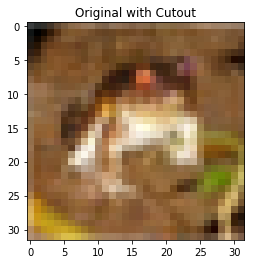

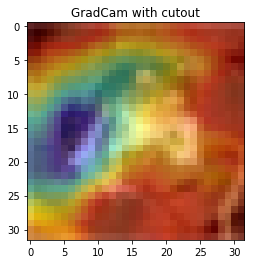

In [18]:
# Recreate the exact same model, including weights and optimizer.
from tensorflow import keras
new_model = keras.models.load_model('my_model_cutout.h5')
new_model.summary()

from keras.preprocessing import image
from PIL import Image
import keras.backend as K
import numpy as np
import cv2
import sys

(train_features_new, train_labels_new), (test_features_new, test_labels_new) = cifar10.load_data()
img = train_features_new[0]
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)


preds = model.predict(x)
class_idx = np.argmax(preds[0])
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("conv2d_8")

grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(256):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
from google.colab.patches import cv2_imshow
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
plt.imshow(img)
plt.title("Original with Cutout")
plt.show()
plt.clf()
plt.imshow(superimposed_img)
plt.title("GradCam with cutout")
plt.show()